In [28]:
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix

In [11]:
with open('./models-pkl/credit.pkl', 'rb') as f:
    x_credit_treino, x_credit_teste, y_credit_treino, y_credit_teste = pickle.load(f)

In [32]:
x_credit_treino

array([[-0.43804839, -0.83530647, -0.37791794],
       [-0.11572219,  0.1735605 , -0.33046302],
       [-0.92153769, -0.38550408, -1.12137828],
       ...,
       [-0.27688529, -0.01679176,  1.17227596],
       [-0.92153769, -0.45460195,  0.06499461],
       [-0.92153769, -0.26424969,  0.38136071]])

In [12]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treino, y_credit_treino)

C:\Users\david\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
previsor = naive_credit_data.predict(x_credit_teste)
value, counts = np.unique(previsor ,return_counts=True)


In [14]:
accuracy_score(y_credit_teste,previsor)

0.7966032330673215

In [15]:
confusion_matrix(y_credit_teste,previsor)

array([[3827,   46],
       [ 948,   66]], dtype=int64)

0.7966032330673215

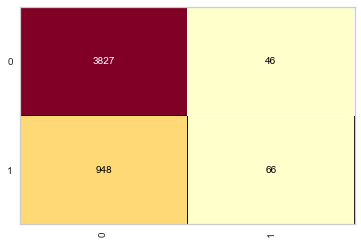

In [16]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treino, y_credit_treino)
cm.score(x_credit_teste, y_credit_teste)

In [17]:
print(classification_report(y_credit_teste, previsor))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      3873
           1       0.59      0.07      0.12      1014

    accuracy                           0.80      4887
   macro avg       0.70      0.53      0.50      4887
weighted avg       0.76      0.80      0.73      4887



In [20]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(x_credit_treino, y_credit_treino)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

0.8062205852261101

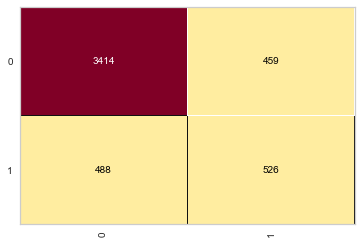

In [27]:
previsor_tree = arvore_credit.predict(x_credit_teste)
#print(accuracy_score(y_credit_teste, previsor_tree))
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treino, y_credit_treino)
cm.score(x_credit_teste, y_credit_teste)


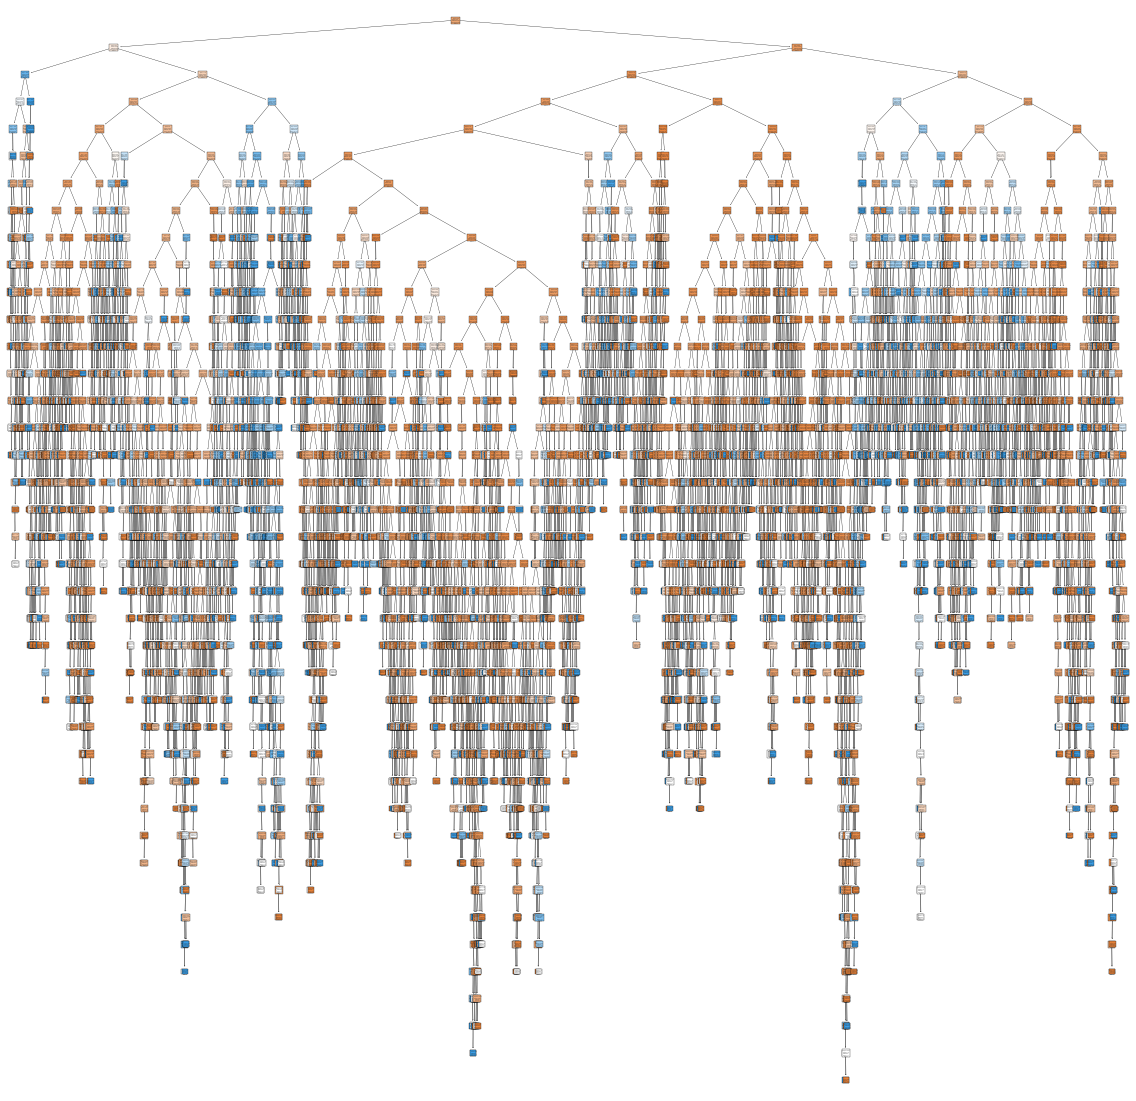

In [31]:
previsores_arvore = ['income','age', 'loan']
fig, azes = plt.subplots(nrows=1, ncols=1, figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores_arvore, class_names=str(arvore_credit.classes_),
              filled = True)
plt.show()